# Análisis de Variables Macroeconómicas de Chile (2022–2025)

Este notebook tiene por objetivo analizar la evolución de las principales variables macroeconómicas de Chile durante el período correspondiente al gobierno del presidente Gabriel Boric (2022–2025). Se utilizarán series temporales de diversos periodos según sea conveniente provenientes de fuentes oficiales, aplicando herramientas estadísticas y visualizaciones en Python para identificar tendencias, fluctuaciones y posibles implicancias económicas.

## Producto interno bruto, referencia 2018 (miles de millones de pesos)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df_pib = pd.read_excel("data/económicos/pib 2015-2025 trimestral.xlsx", skiprows=2)
df_pib = df_pib.iloc[:, 2:]
df_pib = df_pib.melt(var_name="FECHA", value_name="PIB")
df_pib["FECHA"] = pd.to_datetime(df_pib["FECHA"])

In [11]:
# Calcular la variación porcentual trimestral del PIB
df_pib["PIB_var_pct"] = df_pib["PIB"].pct_change() * 100
df_pib.tail()

,FECHA,PIB,PIB_var_pct
36,2024-03-01,76532.681123,1.524052
37,2024-06-01,75091.540332,-1.883040
38,2024-09-01,75344.195615,0.336463
39,2024-12-01,84662.461428,12.367596
40,2025-03-01,82042.344694,-3.094780


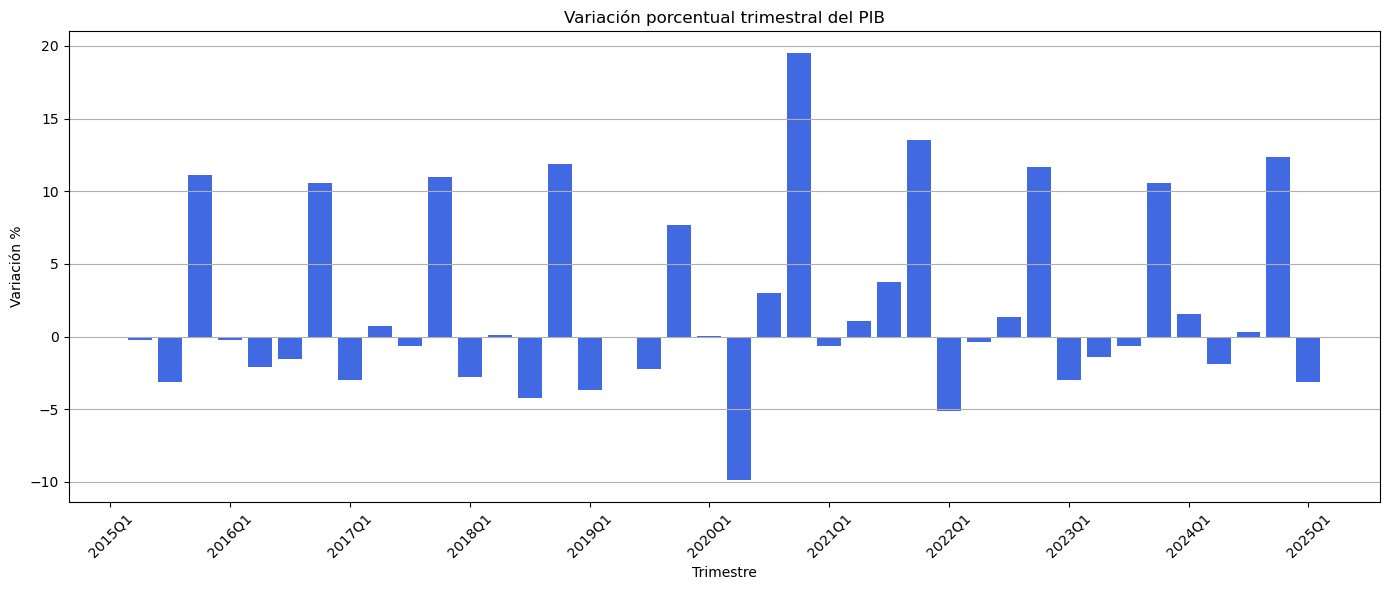

In [12]:
x = range(len(df_pib))
plt.figure(figsize=(14,6))
plt.bar(x, df_pib["PIB_var_pct"], color="royalblue")
plt.xticks(x[::4], df_pib["FECHA"].dt.to_period('Q').astype(str)[::4], rotation=45)
plt.title("Variación porcentual trimestral del PIB")
plt.xlabel("Trimestre")
plt.ylabel("Variación %")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

El PIB sigue una tendencia al aumento, con un claro retraso durante la pandemia de la COVID-19; no obstante, tras este período ha continuado creciendo. Los cuartos trimestres son cuando el país reporta un mayor crecimiento del PIB, lo que puede explicarse por varias razones, entre ellas: aumento de la demanda interna, incremento en la inversión, el consumo y el gasto público hacia fines de año, además del impacto del verano chileno, que puede favorecer una mayor actividad económica en comparación con otros períodos.

### Evolución de la participación sectorial en el PIB (Base 2018)
Se analiza la variación anual en la participación de cada sector económico dentro del Producto Interno Bruto de Chile, utilizando series empalmadas a precios de referencia 2018. Este enfoque permite identificar qué sectores han ganado o perdido peso relativo en la economía durante el período observado.

In [17]:
df_part_pib = pd.read_excel("data/económicos/part cada sector %pib.xlsx", skiprows=2)
df_part_pib["Periodo"] = pd.to_datetime(df_part_pib["Periodo"])
df_part_pib.head()

,Periodo,1. Agropecuario-silvícola,2. Pesca,3. Minería,3.1. Minería del cobre,3.2. Otras actividades mineras,4. Industria Manufacturera,"4.1. Alimentos, bebidas y tabaco",4.1.1. Alimentos,4.1.2. Bebidas y tabaco,...,7.2. Restaurantes y hoteles,8. Transporte,9. Comunicaciones y servicios de información,10. Servicios financieros y empresariales,10.1. Servicios financieros,10.2. Servicios empresariales,11. Servicios de vivienda e inmobiliarios,12. Servicios personales,13. Administración pública,14. Impuestos sobre los productos
0,2015-01-01,3.331474,0.377930,7.943575,7.168827,0.774747,10.398865,3.788096,2.752832,1.035264,...,1.853386,6.547725,3.193525,14.116563,4.301322,9.815241,7.355198,11.106259,4.648728,10.065246
1,2016-01-01,3.599992,0.599098,7.398626,6.449573,0.949053,9.705925,3.550086,2.729502,0.820584,...,1.931020,6.420923,3.048466,13.779603,4.284507,9.495096,7.533808,11.759374,4.817994,10.038709
2,2017-01-01,3.432932,0.848039,8.976588,8.047417,0.929170,9.160845,3.443750,2.741356,0.702394,...,2.030179,6.097784,2.935160,13.163353,4.201966,8.961387,7.806722,11.862818,4.824487,10.061065
3,2018-01-01,3.193594,0.733842,8.881911,7.903259,0.978652,9.604214,3.729970,2.790433,0.939537,...,2.130522,5.676735,2.784317,13.472528,4.420221,9.052307,7.723143,12.174889,4.804467,10.209773
4,2019-01-01,3.185162,0.802650,8.170057,7.255837,0.914220,8.969095,3.615066,2.699684,0.915382,...,2.172323,5.730842,2.792368,13.691236,4.169309,9.521927,7.944283,12.667417,4.930789,10.010570


In [19]:
# Calcula la variación porcentual año a año
df_part_pib_var = df_part_pib.copy()
df_part_pib_var.iloc[:, 1:] = df_part_pib.iloc[:, 1:].pct_change() * 100
df_part_pib_var.head()

,Periodo,1. Agropecuario-silvícola,2. Pesca,3. Minería,3.1. Minería del cobre,3.2. Otras actividades mineras,4. Industria Manufacturera,"4.1. Alimentos, bebidas y tabaco",4.1.1. Alimentos,4.1.2. Bebidas y tabaco,...,7.2. Restaurantes y hoteles,8. Transporte,9. Comunicaciones y servicios de información,10. Servicios financieros y empresariales,10.1. Servicios financieros,10.2. Servicios empresariales,11. Servicios de vivienda e inmobiliarios,12. Servicios personales,13. Administración pública,14. Impuestos sobre los productos
0,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,8.060023,58.520724,-6.860244,-10.033087,22.498434,-6.663611,-6.283108,-0.847495,-20.736746,...,4.188736,-1.936582,-4.542300,-2.386987,-0.390937,-3.261714,2.428344,5.880608,3.641120,-0.263647
2,2017-01-01,-4.640550,41.552756,21.327770,24.774432,-2.095041,-5.615950,-2.995302,0.434305,-14.403179,...,5.135083,-5.032597,-3.716805,-4.472192,-1.926497,-5.620895,3.622522,0.879671,0.134755,0.222697
3,2018-01-01,-6.971832,-13.466051,-1.054712,-1.791364,5.325329,4.839824,8.311284,1.790240,33.762118,...,4.942549,-6.904943,-5.139169,2.348756,5.194114,1.014576,-1.070598,2.630664,-0.414955,1.478049
4,2019-01-01,-0.264020,9.376400,-8.014643,-8.191833,-6.583717,-6.612913,-3.080562,-3.252170,-2.570883,...,1.962022,0.953131,0.289146,1.623369,-5.676445,5.187851,2.863337,4.045440,2.629258,-1.951096


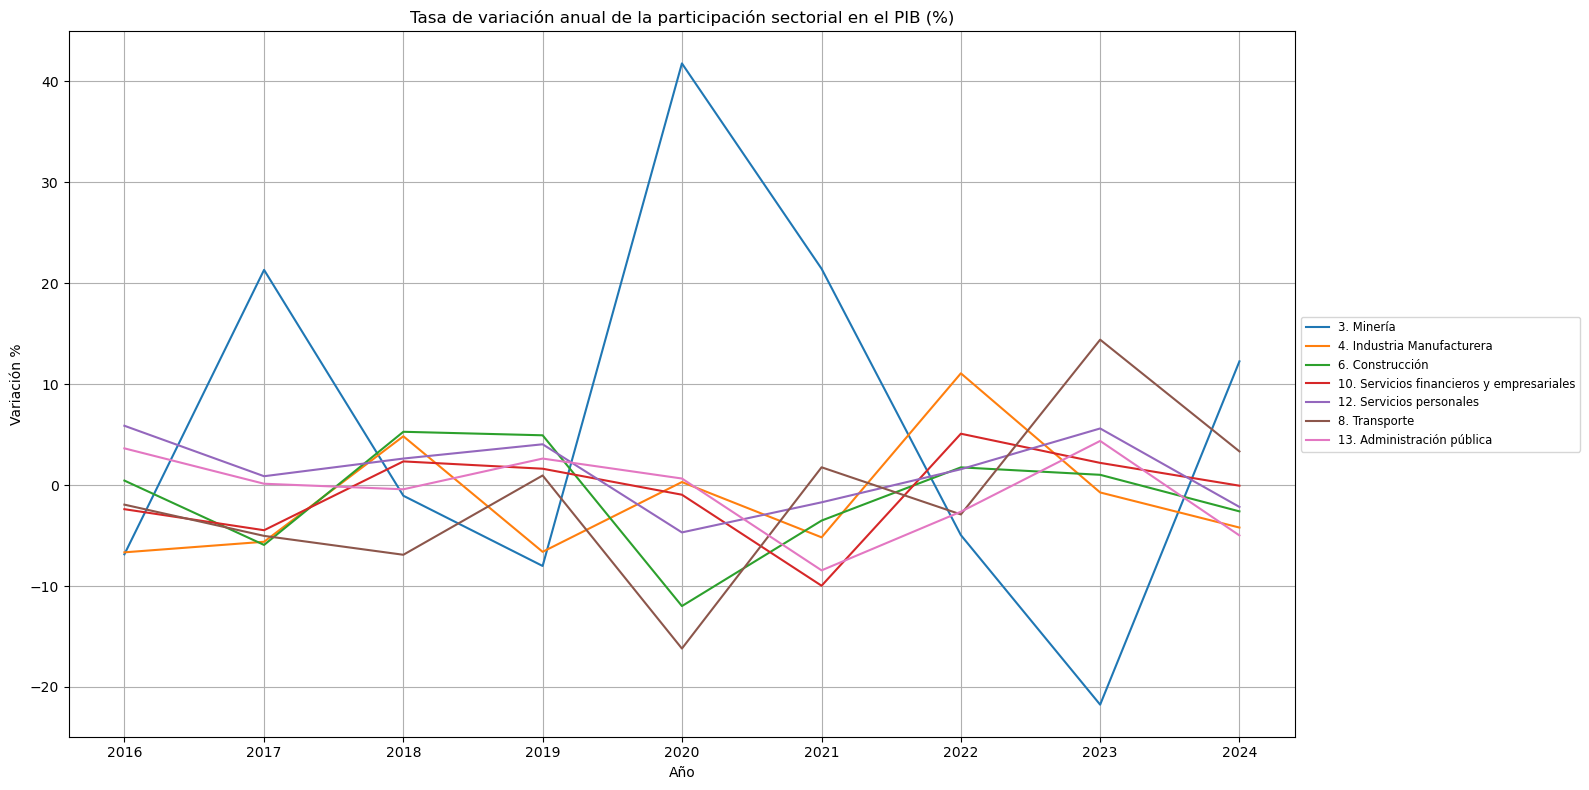

In [25]:
# Elegimos 7 sectores: los 5 clave más 2 adicionales
sectores_7 = [
    "3. Minería", 
    "4. Industria Manufacturera", 
    "6. Construcción", 
    "10. Servicios financieros y empresariales", 
    "12. Servicios personales",
    "8. Transporte", 
    "13. Administración pública"
            ]

plt.figure(figsize=(16, 8))
for sector in sectores_7:
    plt.plot(df_part_pib_var["Periodo"], df_part_pib_var[sector], label=sector)

plt.title("Tasa de variación anual de la participación sectorial en el PIB (%)")
plt.xlabel("Año")
plt.ylabel("Variación %")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1, fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()

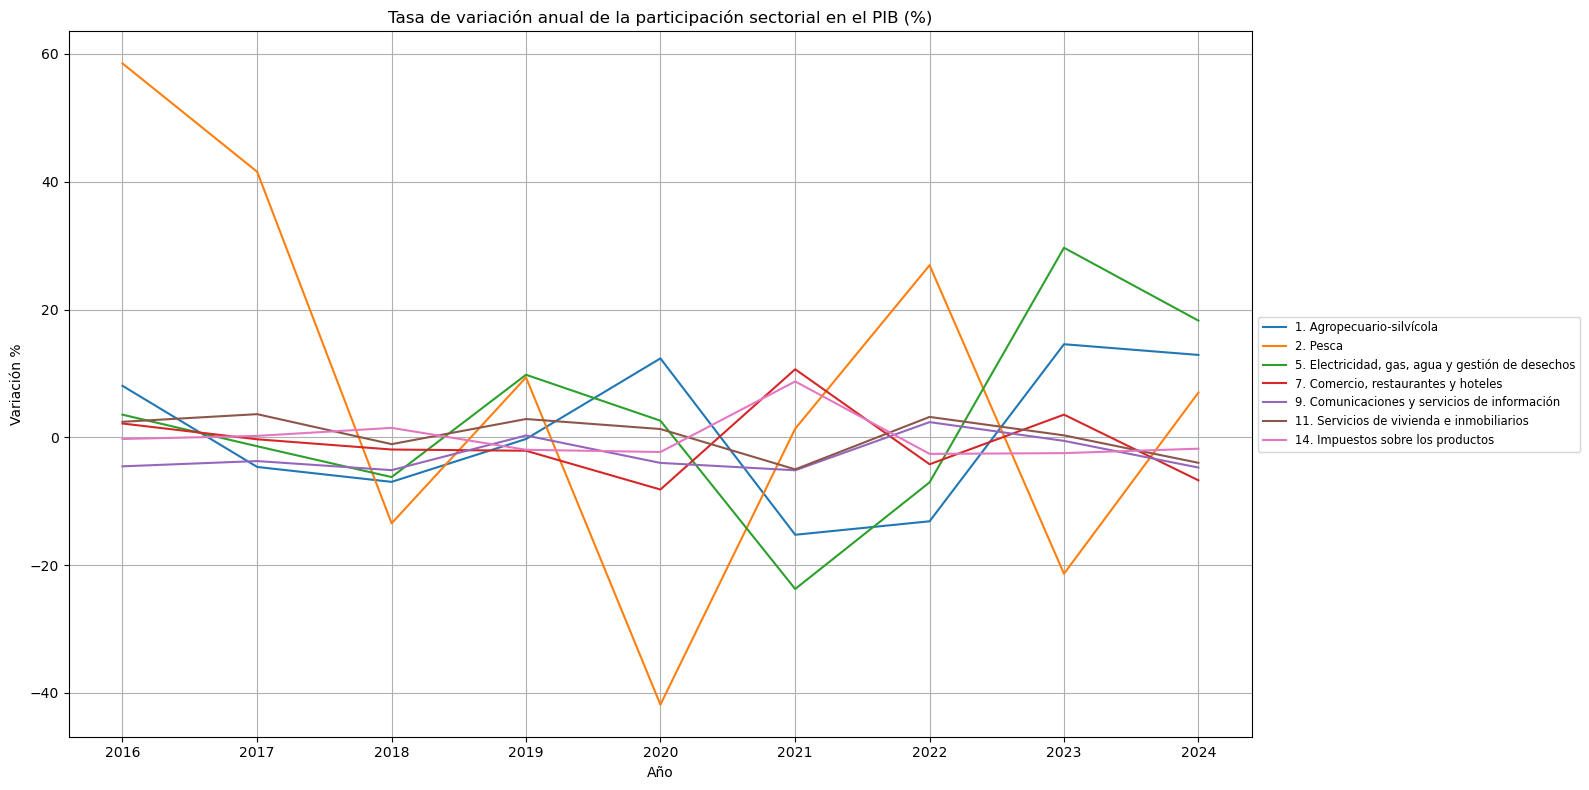

In [26]:
# Los otros 7 sectores restantes
sectores_restantes = [
    "1. Agropecuario-silvícola", 
    "2. Pesca", 
    "5. Electricidad, gas, agua y gestión de desechos", 
    "7. Comercio, restaurantes y hoteles", 
    "9. Comunicaciones y servicios de información", 
    "11. Servicios de vivienda e inmobiliarios", 
    "14. Impuestos sobre los productos"
]

plt.figure(figsize=(16, 8))
for sector in sectores_restantes:
    plt.plot(df_part_pib_var["Periodo"], df_part_pib_var[sector], label=sector)

plt.title("Tasa de variación anual de la participación sectorial en el PIB (%)")
plt.xlabel("Año")
plt.ylabel("Variación %")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1, fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()